<a href="https://colab.research.google.com/github/gouthamans14/deeplearning-tesnorflow/blob/main/CNN/ZTM_CV_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convulutional Nueral Network and Computer vision with TensorFlow

## Food 101

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os


In [3]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-06-15 17:17:01--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 172.217.218.128, 142.250.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  31.9MB/s    in 3.3s    

2023-06-15 17:17:04 (31.9 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [4]:
# unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

In [5]:
!ls pizza_steak

test  train


In [6]:
!ls pizza_steak/test

pizza  steak


In [7]:
!ls pizza_steak/test/pizza/

1001116.jpg  1507019.jpg  2242047.jpg  2944567.jpg  3669673.jpg  556507.jpg
1032754.jpg  1512557.jpg  22489.jpg    296426.jpg   3724187.jpg  565112.jpg
103708.jpg   153195.jpg   2250611.jpg  2971095.jpg  3724353.jpg  573054.jpg
1060407.jpg  1555015.jpg  226472.jpg   2992605.jpg  3724416.jpg  614236.jpg
106507.jpg   1594097.jpg  2265512.jpg  2997525.jpg  3728155.jpg  614981.jpg
1067986.jpg  1618659.jpg  2276783.jpg  300157.jpg   3729167.jpg  61656.jpg
1106738.jpg  1636919.jpg  2296393.jpg  3042459.jpg  373847.jpg	 625434.jpg
1119571.jpg  1655630.jpg  2320458.jpg  3049449.jpg  3754474.jpg  645087.jpg
11297.jpg    1686938.jpg  2323860.jpg  3092704.jpg  3758160.jpg  648055.jpg
1152100.jpg  1687143.jpg  2343304.jpg  309892.jpg   376625.jpg	 65128.jpg
1179703.jpg  1691503.jpg  2392727.jpg  3174637.jpg  3770514.jpg  666569.jpg
1180001.jpg  1694874.jpg  2398925.jpg  321526.jpg   3784357.jpg  678708.jpg
1180273.jpg  1765727.jpg  2406842.jpg  3216107.jpg  3785667.jpg  714866.jpg
1183595.jpg  177

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os

In [9]:
os.walk("pizza_steak")

<generator object _walk at 0x7f590062fbc0>

In [10]:
for dirpath, dirname, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirname)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza


In [11]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

In [12]:
num_steak_images_train

750

### Visualize our Images
#### Getting class names programatically

In [13]:
#get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
data_dir
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [14]:
## Visualize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  #setup the target directory(we'll view images from here)
  target_folder = target_dir+"/"+target_class

  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")


  print(f"Image shape: {img.shape}")
  return img



['1453991.jpg']
Image shape: (341, 512, 3)


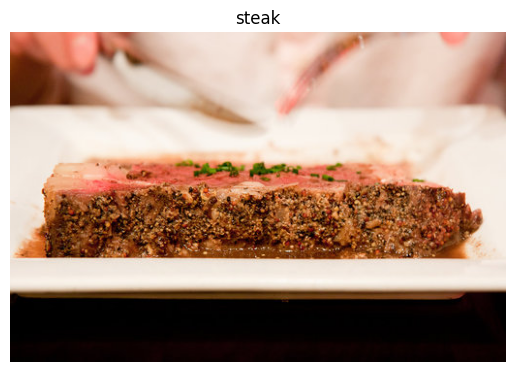

In [14]:
img = view_random_image("pizza_steak/train","steak")

In [15]:
#preprocess images to tensors
tf.constant(img)

<tf.Tensor: shape=(341, 512, 3), dtype=uint8, numpy=
array([[[222, 118,  89],
        [223, 119,  90],
        [226, 122,  95],
        ...,
        [192, 128, 116],
        [188, 124, 112],
        [186, 120, 108]],

       [[219, 115,  86],
        [221, 117,  88],
        [224, 120,  93],
        ...,
        [192, 130, 117],
        [188, 124, 112],
        [184, 120, 108]],

       [[216, 112,  83],
        [218, 114,  87],
        [220, 116,  89],
        ...,
        [192, 130, 117],
        [188, 124, 112],
        [184, 120, 108]],

       ...,

       [[  2,   0,   1],
        [  2,   0,   1],
        [  2,   0,   1],
        ...,
        [ 11,   1,   0],
        [ 11,   1,   0],
        [ 11,   1,   0]],

       [[  2,   0,   1],
        [  2,   0,   1],
        [  2,   0,   1],
        ...,
        [ 11,   1,   0],
        [ 11,   1,   0],
        [ 11,   1,   0]],

       [[  2,   0,   1],
        [  2,   0,   1],
        [  2,   0,   1],
        ...,
        [ 11,   1,   

In [16]:
img.shape

(341, 512, 3)

### Preprocessing the data before passing it to the Nueral Network

#### Neural network prefers normalization that is getting value between 0 and 1

In [17]:
img = img/255.

In [18]:
img

array([[[0.87058824, 0.4627451 , 0.34901961],
        [0.8745098 , 0.46666667, 0.35294118],
        [0.88627451, 0.47843137, 0.37254902],
        ...,
        [0.75294118, 0.50196078, 0.45490196],
        [0.7372549 , 0.48627451, 0.43921569],
        [0.72941176, 0.47058824, 0.42352941]],

       [[0.85882353, 0.45098039, 0.3372549 ],
        [0.86666667, 0.45882353, 0.34509804],
        [0.87843137, 0.47058824, 0.36470588],
        ...,
        [0.75294118, 0.50980392, 0.45882353],
        [0.7372549 , 0.48627451, 0.43921569],
        [0.72156863, 0.47058824, 0.42352941]],

       [[0.84705882, 0.43921569, 0.3254902 ],
        [0.85490196, 0.44705882, 0.34117647],
        [0.8627451 , 0.45490196, 0.34901961],
        ...,
        [0.75294118, 0.50980392, 0.45882353],
        [0.7372549 , 0.48627451, 0.43921569],
        [0.72156863, 0.47058824, 0.42352941]],

       ...,

       [[0.00784314, 0.        , 0.00392157],
        [0.00784314, 0.        , 0.00392157],
        [0.00784314, 0

### Building CNN

* Load our Images
* Preprocess our images
* Build a CNN to find patterns in our images
* Fit the CNN to our training data

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

train_dir = "/content/pizza_steak/train"
test_dir ="/content/pizza_steak/test"
#Import data from directories and turn it into batches

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                              batch_size=32,
                                              target_size=(224,224),#rshaping our 512,512 image to 224,224
                                              class_mode="binary", # we are working with twp classes
                                              seed=42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                              batch_size=32,
                                              target_size=(224,224),#rshaping our 512,512 image to 224,224
                                              class_mode="binary", # we are working with twp classes
                                              seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


### Building CNN

In [20]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(244,244,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),

    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),

    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])


In [21]:
len(train_data)*32

1504

In [22]:
1500/32

46.875

In [23]:
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch =len(train_data),
                        validation_data= valid_data,
                        validation_steps= len(valid_data))

Epoch 1/5
47/47 [==============================] - 24s 252ms/step - loss: 0.6060 - accuracy: 0.6453 - val_loss: 0.4234 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 10s 221ms/step - loss: 0.4633 - accuracy: 0.7840 - val_loss: 0.3970 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 11s 240ms/step - loss: 0.4007 - accuracy: 0.8300 - val_loss: 0.3783 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 10s 223ms/step - loss: 0.3709 - accuracy: 0.8387 - val_loss: 0.3247 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 10s 206ms/step - loss: 0.3280 - accuracy: 0.8600 - val_loss: 0.3165 - val_accuracy: 0.8660


In [24]:
history_1.history

{'loss': [0.6059742569923401,
  0.4633186459541321,
  0.4007495045661926,
  0.3709131181240082,
  0.32797515392303467],
 'accuracy': [0.6453333497047424,
  0.7839999794960022,
  0.8299999833106995,
  0.8386666774749756,
  0.8600000143051147],
 'val_loss': [0.4234355390071869,
  0.3970210552215576,
  0.37828657031059265,
  0.3246898353099823,
  0.3164711594581604],
 'val_accuracy': [0.8059999942779541,
  0.8259999752044678,
  0.8259999752044678,
  0.871999979019165,
  0.8659999966621399]}

### Lets replicate non cnn model to work on image

In [25]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation= "sigmoid")
    ])
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 195ms/step - loss: 0.8118 - accuracy: 0.4973 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 209ms/step - loss: 0.6932 - accuracy: 0.4993 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 210ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 210ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 198ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [26]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [27]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_2 (Dense)             (None, 4)                 602116    
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


### Binary Classification
* Become one with data
* Process the data ( Prepare it for modelling, scaling/normalizing and create batches)
* Created a model
* Fit the model
* Evaluate the model
* Adjust different parameters and improve the model
* Experiment until satisfied


#### Become one with data

['2315295.jpg']
Image shape: (512, 512, 3)
['3057192.jpg']
Image shape: (512, 512, 3)


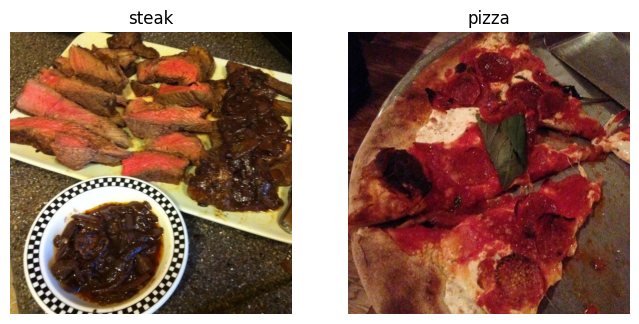

In [20]:
plt.figure(figsize=(8,8))

plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")

plt.subplot(1,2,2)
steak_img = view_random_image("pizza_steak/train/", "pizza")



#### Preprocess the data

* Split the data into training and test sets

In [19]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

* Turn data into batches.

A batch is a small subset of data. Rather than looking at all the data at once
our model might only look at 32 at a time

This is for couple of reaseons:


1.   10000 Images will not fit into our memory at one time.
2.   Trying to learn patterns of 10k images at one time could not results in good pattern identifications

* why 32?

Default batch size






In [15]:
### Create train and test data generators and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [21]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [22]:
# Creating train and test data loader from directory

train_data = train_datagen.flow_from_directory(directory =train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [23]:
# get a sample of training data batch

images, labels =train_data.next() # will get the next batch of the training data

len(images), len(labels)

(32, 32)

#### Create a CNN model

* how to chose architecture?

Start with relatively simple model and scale according to the data.
Thera are infinite ways to create a DL architectures.
So start working on something simple which you can control and build on top of it


In [68]:
## We will start with a baseline model

### Making the modelling part a little easier
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D


In [69]:
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)),
    Conv2D(10,3, padding="valid", activation="relu"),
    Conv2D(10,3, padding="same", activation="relu"),
    #Conv2D(10,3,, padding="same" activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")

])

In [70]:
model_4.compile(loss= "binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [71]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_4 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 484000)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 484001    
                                                                 
Total params: 486,101
Trainable params: 486,101
Non-trainable params: 0
_________________________________________________________________


In [29]:
32*47

1504

In [72]:
### Fit the Model
history_4 = model_4.fit(train_data, epochs=5,
           steps_per_epoch=len(train_data),
           validation_data = test_data,
           validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 16s 280ms/step - loss: 0.6602 - accuracy: 0.6507 - val_loss: 0.4245 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 19s 405ms/step - loss: 0.4603 - accuracy: 0.7987 - val_loss: 0.3953 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 16s 341ms/step - loss: 0.3564 - accuracy: 0.8567 - val_loss: 0.3844 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 18s 388ms/step - loss: 0.2261 - accuracy: 0.9253 - val_loss: 0.3595 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 16s 340ms/step - loss: 0.0842 - accuracy: 0.9740 - val_loss: 0.6850 - val_accuracy: 0.7580


In [73]:
model_4.evaluate(test_data)

16/16 [==============================] - 3s 207ms/step - loss: 0.6850 - accuracy: 0.7580


[0.6850202679634094, 0.7580000162124634]

### Evaluating baseline models

In [74]:
import pandas as pd

history_4_df = pd.DataFrame(history_4.history)

In [75]:
history_4_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.660203,0.650667,0.424499,0.814
1,0.460272,0.798667,0.395303,0.830
2,0.356360,0.856667,0.384439,0.822
3,0.226051,0.925333,0.359539,0.844
4,0.084211,0.974000,0.685020,0.758


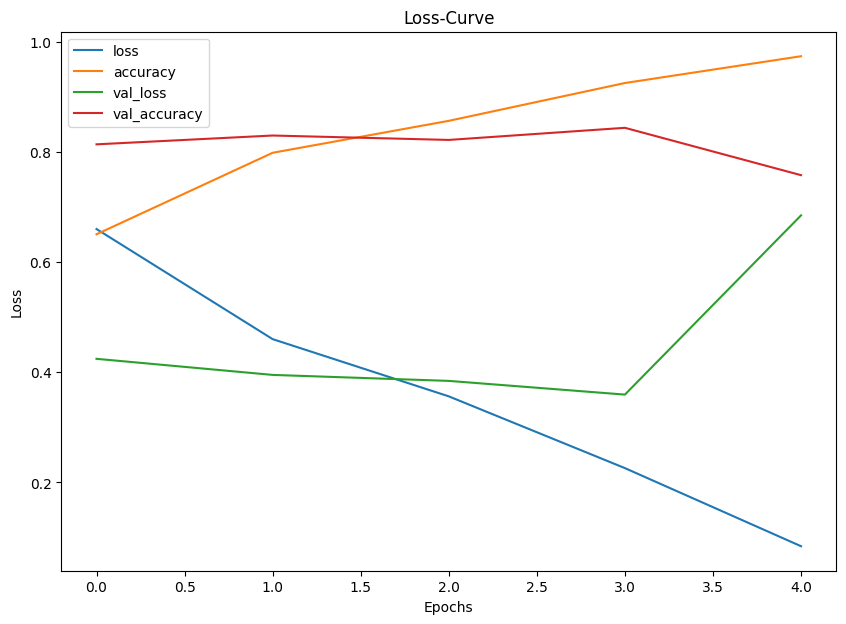

In [76]:
history_4_df.plot(figsize=(10,7),
    kind="line",xlabel="Epochs",ylabel="Loss", title="Loss-Curve")
plt.show()

In [77]:
history_4.history["loss"]

[0.660203218460083,
 0.46027177572250366,
 0.35636043548583984,
 0.2260509431362152,
 0.08421055972576141]

In [78]:
range(0, len(history_4.history["loss"]))

range(0, 5)

In [79]:
def plot_loss_curves(history):
    """
    Returns seperate loss curves for training and validation curves
    """

    train_loss = history.history["loss"]
    train_accuracy= history.history["accuracy"]
    val_loss   = history.history["val_loss"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    #plot loss
    plt.figure()
    plt.plot(epochs,train_loss, label="Training_loss")
    plt.plot(epochs, val_loss, label="Val_loss")
    plt.title("Loss")
    plt.xlabel("epochs")
    plt.legend()
    plt.show()

    #plot accuracy
    plt.figure()
    plt.plot(epochs, train_accuracy, label="Test Accuracy")
    plt.plot(epochs, val_accuracy, label="Val Accuracy")
    plt.title("Accuracy plot")
    plt.xlabel("Epoch")
    plt.legend()
    plt.show()



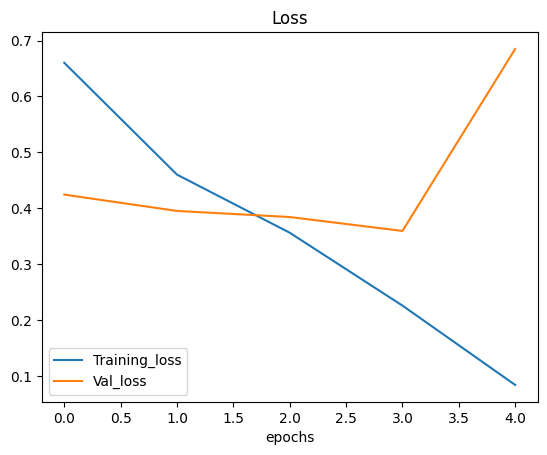

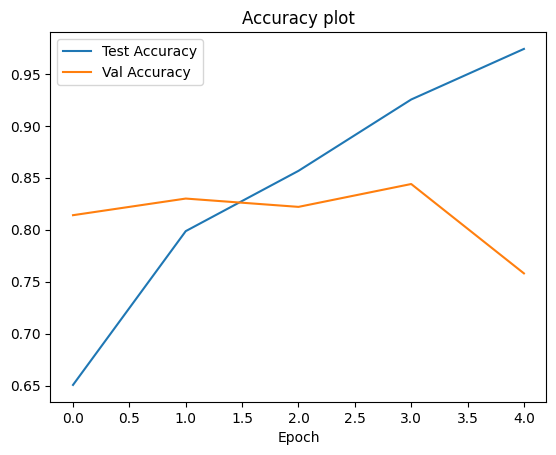

In [80]:
plot_loss_curves(history_4)

#### Note: The Validation loss starts to go up - The model is overfitting
* it is not generalizing well

### Fitting a machine learning model:



1.   Create a baseline model
2.   Beat the baseline model by overfitting a large model.
3.   Reduce Overfitting.








### Ways to induce Overfitting:



*   Increase the conv layers
*   Increase the conv filters
*   Add another Dense layer to output of our flattened layer


### Ways to Reduce Overfitting:

* Add data augmentation
* Add regularization layers(Maxpool2D)
* Add more data




